In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import NearMiss               # Undersampling
from imblearn.over_sampling import RandomOverSampler       # Oversampling
from imblearn.combine import SMOTETomek                    # Both Undersampling & Oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_squared_error, mean_absolute_error


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
payment_card =pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [4]:
payment_card.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
payment_card.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Numbers of row column in this dataset

In [7]:
print(payment_card.shape)

(6362620, 11)


Data set information 

In [8]:
payment_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking if there is any null value exist 

In [9]:
payment_card.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

all the fraud transection

In [6]:
payment_card[payment_card['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Non Fraud Transection

In [7]:
payment_card[payment_card['isFraud']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


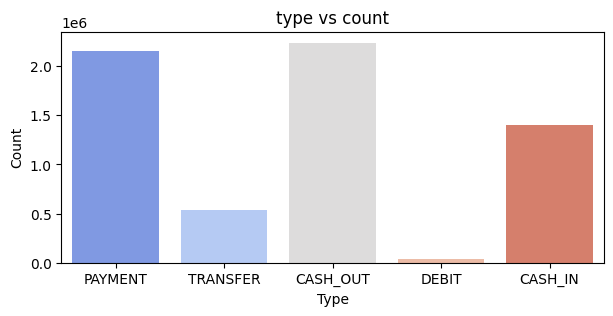

In [11]:
# Countplot of 'type'
plt.figure(figsize=(7,3))
plt.title('type vs count')
sns.countplot(data=payment_card,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [8]:
payment_card[(payment_card['isFraud']==1) ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


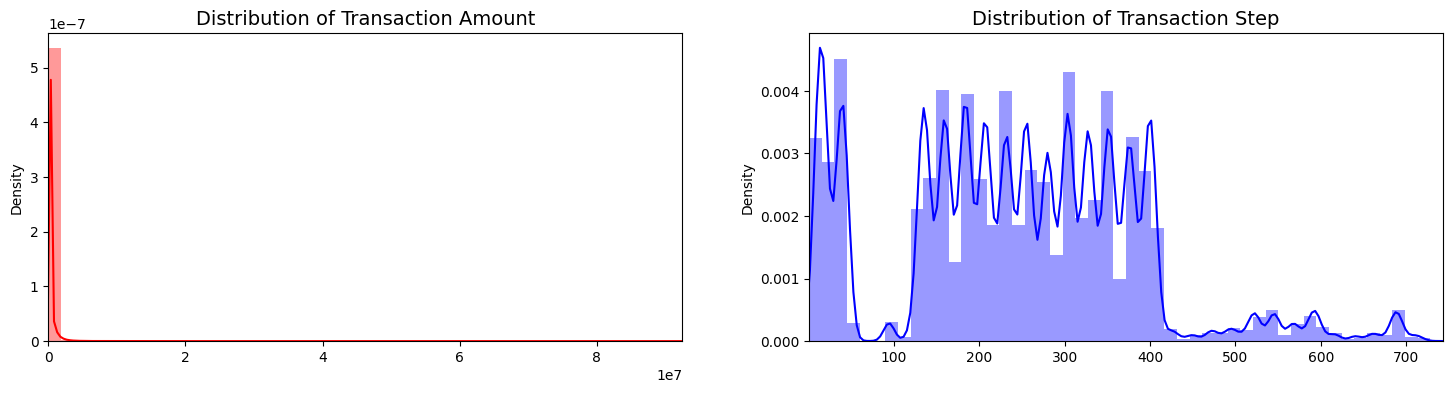

In [9]:
# Plotting subplot for amount and time column
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = payment_card['amount'].values
time_val = payment_card['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

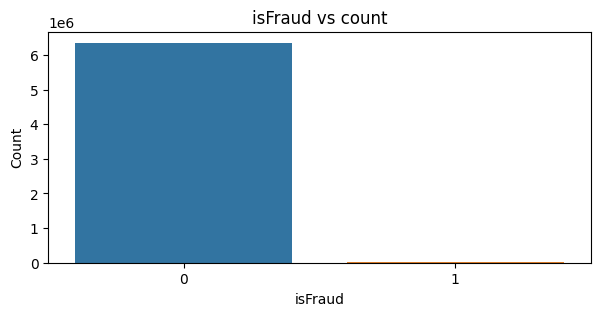

In [10]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=payment_card,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()


In [11]:
payment_card['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
#the percentage of each category in isFraud column(target column)
print("No Frauds:",payment_card['isFraud'].value_counts()[0]/len(payment_card['isFraud'])*100)
print("Frauds:",payment_card['isFraud'].value_counts()[1]/len(payment_card['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


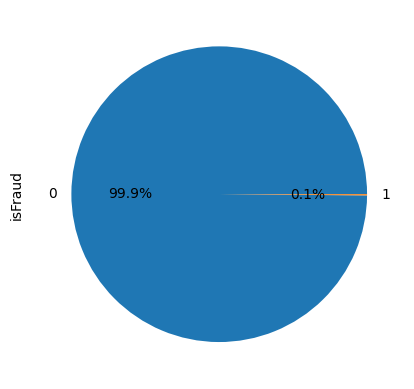

In [12]:
payment_card['isFraud'].value_counts().plot.pie(autopct='%1.1f%%');

In [13]:
numerical=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

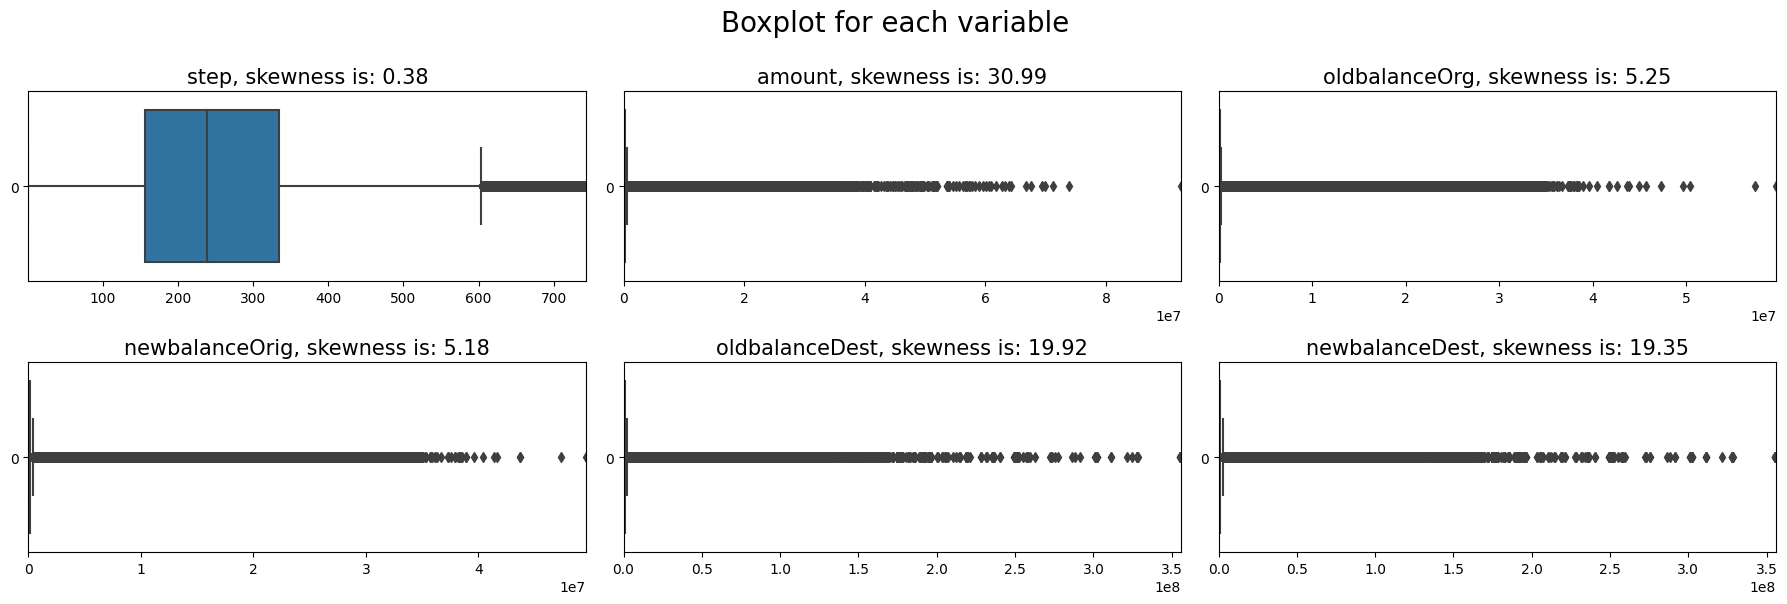

In [14]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,3,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=payment_card,column=numerical)
plt.tight_layout()

In [15]:
# Checking nameOrig,nameDest column
nameOrig=payment_card['nameOrig'].unique()
print("Unique in nameOrig:",len(nameOrig))
print(nameOrig)

nameDest=payment_card['nameDest'].unique()
print("Unique in nameDest:",len(nameDest))
print(nameDest)

Unique in nameOrig: 6353307
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
Unique in nameDest: 2722362
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [18]:
# Checking isFlaggedFraud column
payment_card['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [17]:
payment_card.tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,742,TRANSFER,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,1,0
6362602,742,TRANSFER,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,0
6362604,742,TRANSFER,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0


In [19]:
# Dropping columns that are not needed
payment_card.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [20]:
payment_card.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362600,742,TRANSFER,652993.91,652993.91,0.0,0.00,0.00,1
6362601,742,CASH_OUT,652993.91,652993.91,0.0,0.00,652993.91,1
6362602,742,TRANSFER,1819543.69,1819543.69,0.0,0.00,0.00,1
6362603,742,CASH_OUT,1819543.69,1819543.69,0.0,0.00,1819543.69,1
6362604,742,TRANSFER,54652.46,54652.46,0.0,0.00,0.00,1
6362605,742,CASH_OUT,54652.46,54652.46,0.0,0.00,54652.46,1
6362606,742,TRANSFER,303846.74,303846.74,0.0,0.00,0.00,1
6362607,742,CASH_OUT,303846.74,303846.74,0.0,343660.89,647507.63,1
6362608,742,TRANSFER,258355.42,258355.42,0.0,0.00,0.00,1
6362609,742,CASH_OUT,258355.42,258355.42,0.0,25176.67,283532.09,1


Applying onehot encoding on type column

In [21]:

payment_card=pd.get_dummies(data=payment_card,columns=['type'],drop_first=True)


In [22]:
payment_card.head(20)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.0,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,1,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,1,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,1,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,1,0
8,1,4024.36,2671.00,0.00,0.0,0.00,0,0,0,1,0
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,1,0,0


using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers

In [24]:
scale=RobustScaler()
for feature in numerical:
    payment_card[feature]=scale.fit_transform(payment_card[feature].values.reshape(-1, 1))
payment_card.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0,0,1,0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0,0,1,0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,1,0,0,0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0,0,1,0


Splitting our data into independent and dependent features

In [25]:
x=payment_card.drop('isFraud',axis=1)
y=payment_card['isFraud']

In [26]:
x.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [27]:
payment_card[payment_card['isFraud']==1]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,-1.329609,-0.382380,-0.130708,0.0,-0.140722,-0.193057,1,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.0,-0.118260,-0.193057,1,1,0,0,0
251,-1.329609,-0.368941,-0.106248,0.0,-0.140722,-0.193057,1,0,0,0,1
252,-1.329609,-0.368941,-0.106248,0.0,-0.112937,-0.193057,1,1,0,0,0
680,-1.329609,-0.280261,0.055165,0.0,-0.140722,-0.193057,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,2.815642,1.355693,3.032881,0.0,-0.140722,0.112438,1,1,0,0,0
6362616,2.815642,31.927899,58.679504,0.0,-0.140722,-0.193057,1,0,0,0,1
6362617,2.815642,31.927899,58.679504,0.0,-0.068096,5.544730,1,1,0,0,0
6362618,2.815642,3.968274,7.788223,0.0,-0.140722,-0.193057,1,0,0,0,1


In [28]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[1.39041885e-01 2.49704710e-01 2.75646250e-01 7.81137861e-02
 5.25735686e-02 1.90383990e-01 7.56201310e-03 0.00000000e+00
 8.98111287e-06 6.96481536e-03]


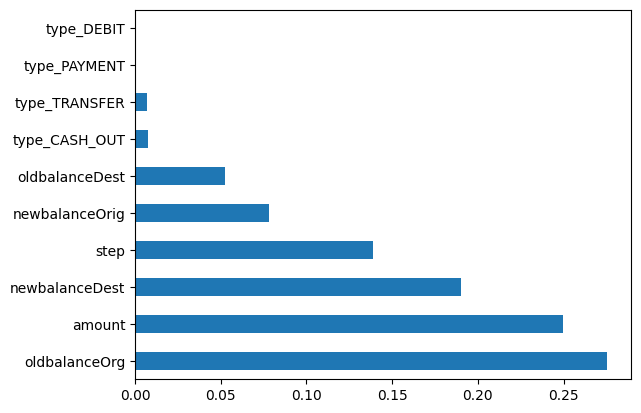

In [29]:
#plot graph of feature importances for better visualization
feat_importances  = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
# Doing train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
# Applying StratifiedKFold
skf=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [31]:
model1=LogisticRegression()
param={'C':10.0 **np.arange(-1,2)}
lrs=RandomizedSearchCV(model1,param,cv=skf,n_jobs=-1,scoring='accuracy')
lrs.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [34]:
payment_card.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0,0,1,0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0,0,1,0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,1,0,0,0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0,0,1,0


In [32]:
from tensorflow import keras

In [33]:
best_model = lrs.best_estimator_
coefficients = best_model.coef_
intercept = best_model.intercept_
classes = best_model.classes_

print("Logistic Regression Model Summary:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Classes:", classes)

# Example of using the model to predict and evaluate
predictions = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)
print("Predictions:", predictions)
print("Accuracy:", accuracy)


Logistic Regression Model Summary:
Coefficients: [[ 0.93760704 -3.23392666  3.17601298 -4.72152668  5.19980777 -6.45575307
   7.48603855 -4.29149839 -3.34955892  9.06812325]]
Intercept: [-14.78258442]
Classes: [0 1]
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9992597389125863


In [34]:
y_pred=lrs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1906161     141]
 [   1272    1212]]
0.9992597389125863
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.49      0.63      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [35]:
import pickle

In [40]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lrs)
#Loading the pickled model
lrs_from_pickle = pickle.loads(saved_model)

In [41]:
# Assuming your RandomizedSearchCV instance is called 'random_search'
# Save the entire RandomizedSearchCV object
with open('lrs_model.pkl', 'wb') as f:
    pickle.dump(lrs, f)

In [37]:
from tensorflow import keras

In [38]:
print(type(model))

<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


In [42]:
#Testing loaded pickled model to make predictions
print("Test Case 1:")
res = lrs_from_pickle.predict([[720,20,200,900,200,0,1,0,0,0]])
if(res== [0]):
    print("Non-Fraud")
else :
    print("Fraud")
print("Test Case 2: ")
res = lrs_from_pickle.predict([[720,200,200,0,0,0,1,0,0,0]])
if(res== [0]):
    print("Non-Fraud")
else :
    print("Fraud")


Test Case 1:
Non-Fraud
Test Case 2: 
Fraud


In [44]:
print(type(lrs_from_pickle))

<class 'sklearn.model_selection._search.RandomizedSearchCV'>


In [43]:
best_model = lrs_from_pickle.best_estimator_
coefficients = best_model.coef_
intercept = best_model.intercept_
classes = best_model.classes_

print("Logistic Regression Model Summary (splitting):")
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Classes:", classes)

# Example of using the model to predict and evaluate
predictions = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)
print("Predictions:", predictions)
print("Accuracy:", accuracy)


Logistic Regression Model Summary (splitting):
Coefficients: [[ 0.93760704 -3.23392666  3.17601298 -4.72152668  5.19980777 -6.45575307
   7.48603855 -4.29149839 -3.34955892  9.06812325]]
Intercept: [-14.78258442]
Classes: [0 1]
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9992597389125863


# Data PreProcessing 

In [45]:
def plot_ROC_curve(y_test, prob):
    #Takes actual and predicted probablities as a input and plot receiver operating chracteritics 
    fpr, tpr, threshold = roc_curve(y_test, prob)
    plt.title("ROC curve plot")
    plt.plot(fpr, tpr, 'b', label="curve measure")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
def model_evaluation(test, pred):
    print("Model accuracy:\n", accuracy_score(test, pred))
    print()
    print("Confusion metrix:\n", confusion_matrix(test, pred))
    print()
    print("Classification report:\n", classification_report(test,pred))

In [46]:
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score, recall_score

No. of components: 1
Accuracy:  0.9986986492985594
F1 Score Macro:  0.49967445049760323
F1 Score Micro:  0.9986986492985594
F1 Score Weighted:  0.9980483976019124
Model accuracy:
 0.9986986492985594

Confusion metrix:
 [[1906302       0]
 [   2484       0]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.00      0.00      0.00      2484

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



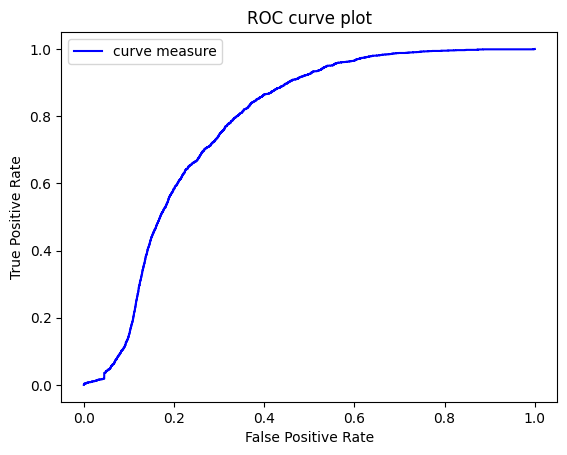

No. of components: 2
Accuracy:  0.9986986492985594
F1 Score Macro:  0.49967445049760323
F1 Score Micro:  0.9986986492985594
F1 Score Weighted:  0.9980483976019124
Model accuracy:
 0.9986986492985594

Confusion metrix:
 [[1906302       0]
 [   2484       0]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.00      0.00      0.00      2484

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



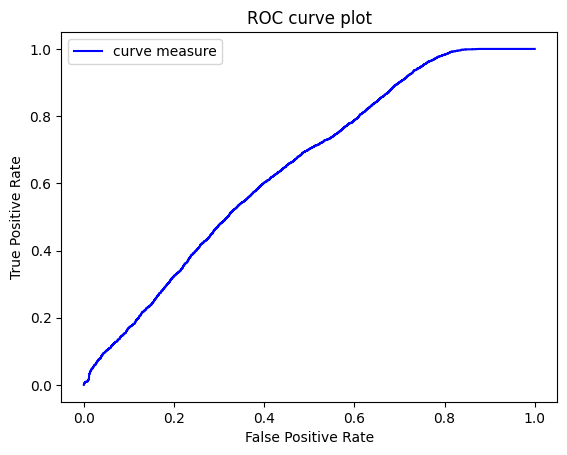

No. of components: 3
Accuracy:  0.9987117466284853
F1 Score Macro:  0.5533982122350803
F1 Score Micro:  0.9987117466284853
F1 Score Weighted:  0.9981947147168257
Model accuracy:
 0.9987117466284853

Confusion metrix:
 [[1906179     123]
 [   2336     148]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.55      0.06      0.11      2484

    accuracy                           1.00   1908786
   macro avg       0.77      0.53      0.55   1908786
weighted avg       1.00      1.00      1.00   1908786



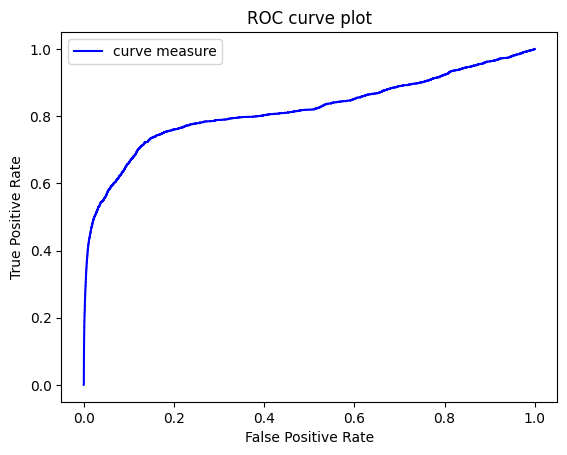

No. of components: 4
Accuracy:  0.9992052540200944
F1 Score Macro:  0.7956288454059937
F1 Score Micro:  0.9992052540200944
F1 Score Weighted:  0.9990713580970588
Model accuracy:
 0.9992052540200944

Confusion metrix:
 [[1906170     132]
 [   1385    1099]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.89      0.44      0.59      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.72      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



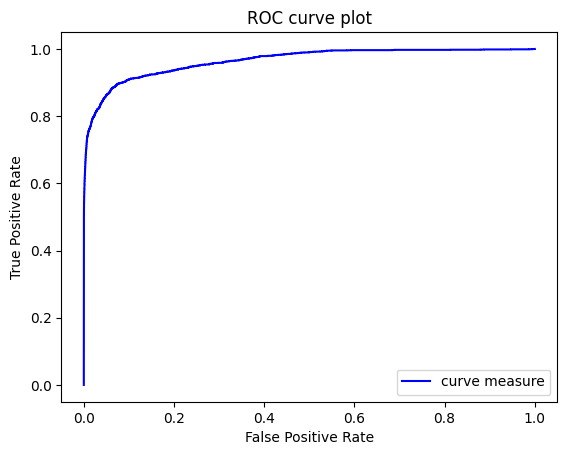

No. of components: 5
Accuracy:  0.9992057779132915
F1 Score Macro:  0.79581847383758
F1 Score Micro:  0.9992057779132915
F1 Score Weighted:  0.9990721130586127
Model accuracy:
 0.9992057779132915

Confusion metrix:
 [[1906170     132]
 [   1384    1100]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.89      0.44      0.59      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.72      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



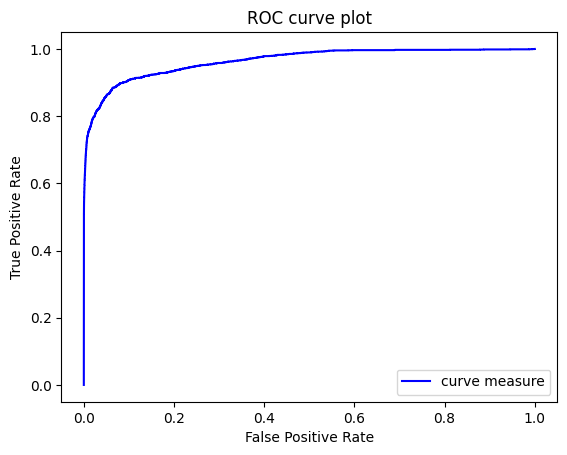

No. of components: 6
Accuracy:  0.9992063018064885
F1 Score Macro:  0.7941266621425422
F1 Score Micro:  0.9992063018064885
F1 Score Weighted:  0.9990679747255022
Model accuracy:
 0.9992063018064885

Confusion metrix:
 [[1906187     115]
 [   1400    1084]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.44      0.59      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.72      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



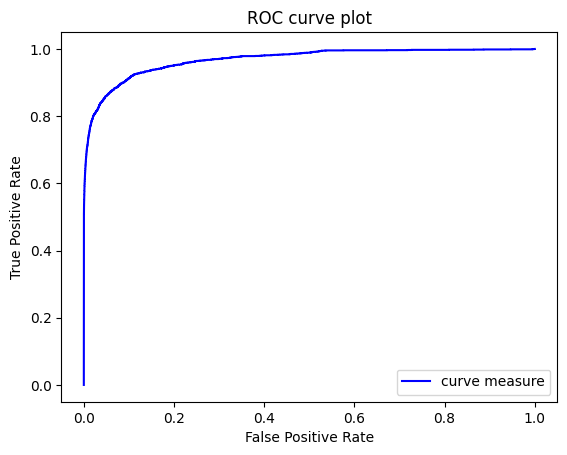

No. of components: 7
Accuracy:  0.9992419265438871
F1 Score Macro:  0.8086610201002986
F1 Score Micro:  0.9992419265438871
F1 Score Weighted:  0.9991235763633242
Model accuracy:
 0.9992419265438871

Confusion metrix:
 [[1906170     132]
 [   1315    1169]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.47      0.62      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786



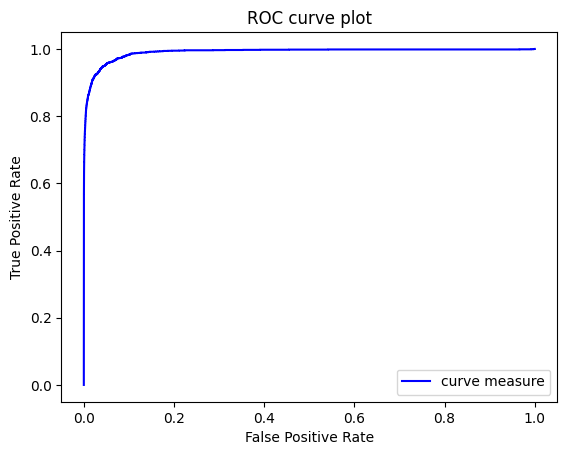

No. of components: 8
Accuracy:  0.9992592150193893
F1 Score Macro:  0.8153156615132278
F1 Score Micro:  0.9992592150193893
F1 Score Weighted:  0.9991495221466045
Model accuracy:
 0.9992592150193893

Confusion metrix:
 [[1906163     139]
 [   1275    1209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.49      0.63      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



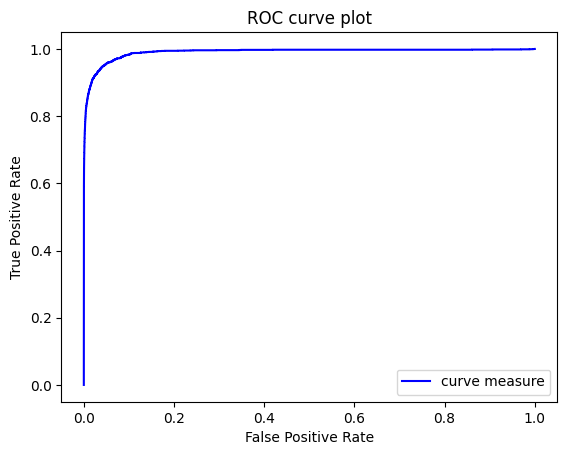

No. of components: 9
Accuracy:  0.9992586911261923
F1 Score Macro:  0.8152332185820064
F1 Score Micro:  0.9992586911261923
F1 Score Weighted:  0.9991490459478927
Model accuracy:
 0.9992586911261923

Confusion metrix:
 [[1906162     140]
 [   1275    1209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.49      0.63      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



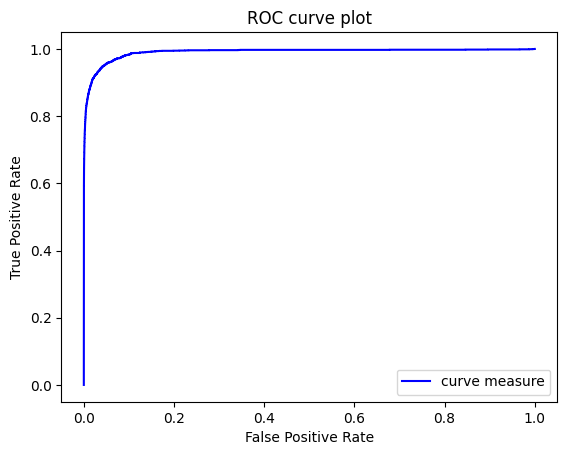

No. of components: 10
Accuracy:  0.9992586911261923
F1 Score Macro:  0.8152332185820064
F1 Score Micro:  0.9992586911261923
F1 Score Weighted:  0.9991490459478927
Model accuracy:
 0.9992586911261923

Confusion metrix:
 [[1906162     140]
 [   1275    1209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906302
           1       0.90      0.49      0.63      2484

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



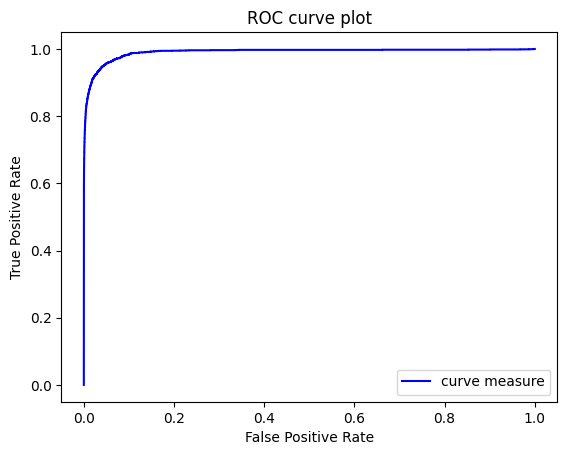

In [47]:
numberOfFeatures = x.shape[1]

ncomp = [lrs]*numberOfFeatures
acc = [lrs]*numberOfFeatures
f1mi = [lrs]*numberOfFeatures
f1ma = [lrs]*numberOfFeatures
f1w = [lrs]*numberOfFeatures

for i in range (numberOfFeatures):
    pca = PCA(n_components=i+1)
    ncomp[i] = i+1
    print(f"No. of components: {pca.n_components}")
    
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)

    Model = LogisticRegression(random_state=42)
    Model.fit(x_train_pca, np.ravel(y_train))

    y_pred = Model.predict(x_test_pca)
    acc[i] = accuracy_score(y_test, y_pred)
    f1ma[i]  = f1_score(y_test, y_pred, average='macro')
    f1mi[i]  = f1_score(y_test, y_pred, average='micro')
    f1w[i]  = f1_score(y_test, y_pred, average='weighted')
    print ("Accuracy: ", acc[i])
    print ("F1 Score Macro: ",f1ma[i])
    print ("F1 Score Micro: ",f1mi[i])
    print ("F1 Score Weighted: ",f1w[i])
    
    predec_prob = Model.predict_proba(x_test_pca)[:,1]
    model_evaluation(y_test, y_pred)
    plot_ROC_curve(y_test, predec_prob)

# Sampling Data

In [48]:
# Lets shuffle the data before creating the subsamples

payment_card = payment_card.sample(frac=1)

# amount of fraud classes 8213 rows.
fraud_df = payment_card.loc[payment_card['isFraud'] == 1]
non_fraud_df = payment_card.loc[payment_card['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1725908,-0.441341,-0.316813,-0.132395,0.0,-0.140722,-0.193057,0,0,0,1,0
4633243,0.508380,0.416972,1.215261,0.0,0.028683,0.091206,0,1,0,0,0
3399627,0.089385,3.032714,6.085344,0.0,-0.140722,0.407044,1,1,0,0,0
4372946,0.396648,6.450802,12.306847,0.0,-0.140722,-0.193057,1,0,0,0,1
1464442,-0.553073,-0.348578,-0.069184,0.0,-0.046615,-0.107142,1,1,0,0,0


In [49]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: isFraud, dtype: float64


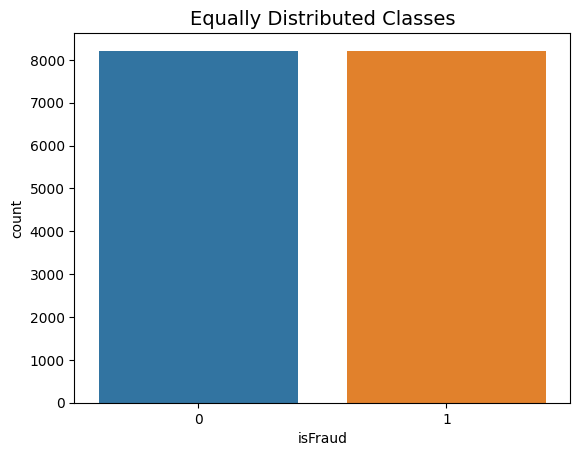

In [50]:
sns.countplot(x='isFraud',data= new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

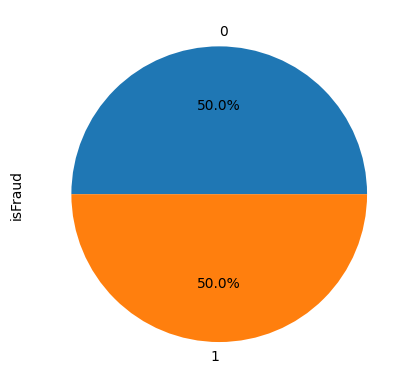

In [51]:
new_df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%');

In [52]:
new_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6133089,1.703911,0.703641,0.520653,1.957581,0.725663,0.350798,0,0,0,0,0
987265,-1.083799,0.079370,-0.130121,0.000000,1.326036,1.132215,0,1,0,0,0
1032311,-0.815642,-0.362213,-0.094002,0.000000,-0.140722,-0.189351,1,1,0,0,0
1487413,-0.541899,-0.009254,0.548444,0.000000,-0.140722,-0.193057,1,0,0,0,1
182862,-1.262570,-0.381217,-0.128593,0.000000,0.811837,0.774517,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5570150,0.860335,-0.086826,-0.132395,0.000000,-0.140722,-0.193057,0,0,0,1,0
786113,-1.117318,-0.338516,8.753215,6.670736,-0.079753,-0.149216,0,0,0,0,0
6078964,1.564246,8.034436,15.189330,0.000000,-0.140722,-0.193057,1,0,0,0,1
576341,-1.173184,0.992003,2.370903,0.000000,0.068352,0.225868,1,1,0,0,0


In [53]:
payment_card

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
329649,-1.245810,-0.347145,1.845364,1.422309,-0.140722,-0.193057,0,0,0,1,0
5874800,0.916201,-0.379152,-0.132395,0.000000,-0.140722,-0.193057,0,0,0,1,0
129099,-1.273743,-0.291259,0.339719,0.226574,-0.140722,-0.193057,0,0,0,1,0
2600481,-0.173184,0.268937,0.618085,1.441453,1.029051,0.718087,0,0,0,0,0
5467258,0.782123,1.082127,-0.023715,0.000000,-0.140722,0.064380,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3563241,0.117318,0.755505,0.167805,0.000000,-0.051222,0.082908,0,0,0,0,1
3671317,0.206704,0.209852,45.323790,34.618440,0.028762,-0.153516,0,0,0,0,0
6347547,2.541899,-0.339403,0.033891,0.064254,-0.140722,-0.193057,0,0,0,1,0
5547148,0.798883,-0.314753,0.726598,0.546188,-0.140722,-0.193057,0,0,0,1,0


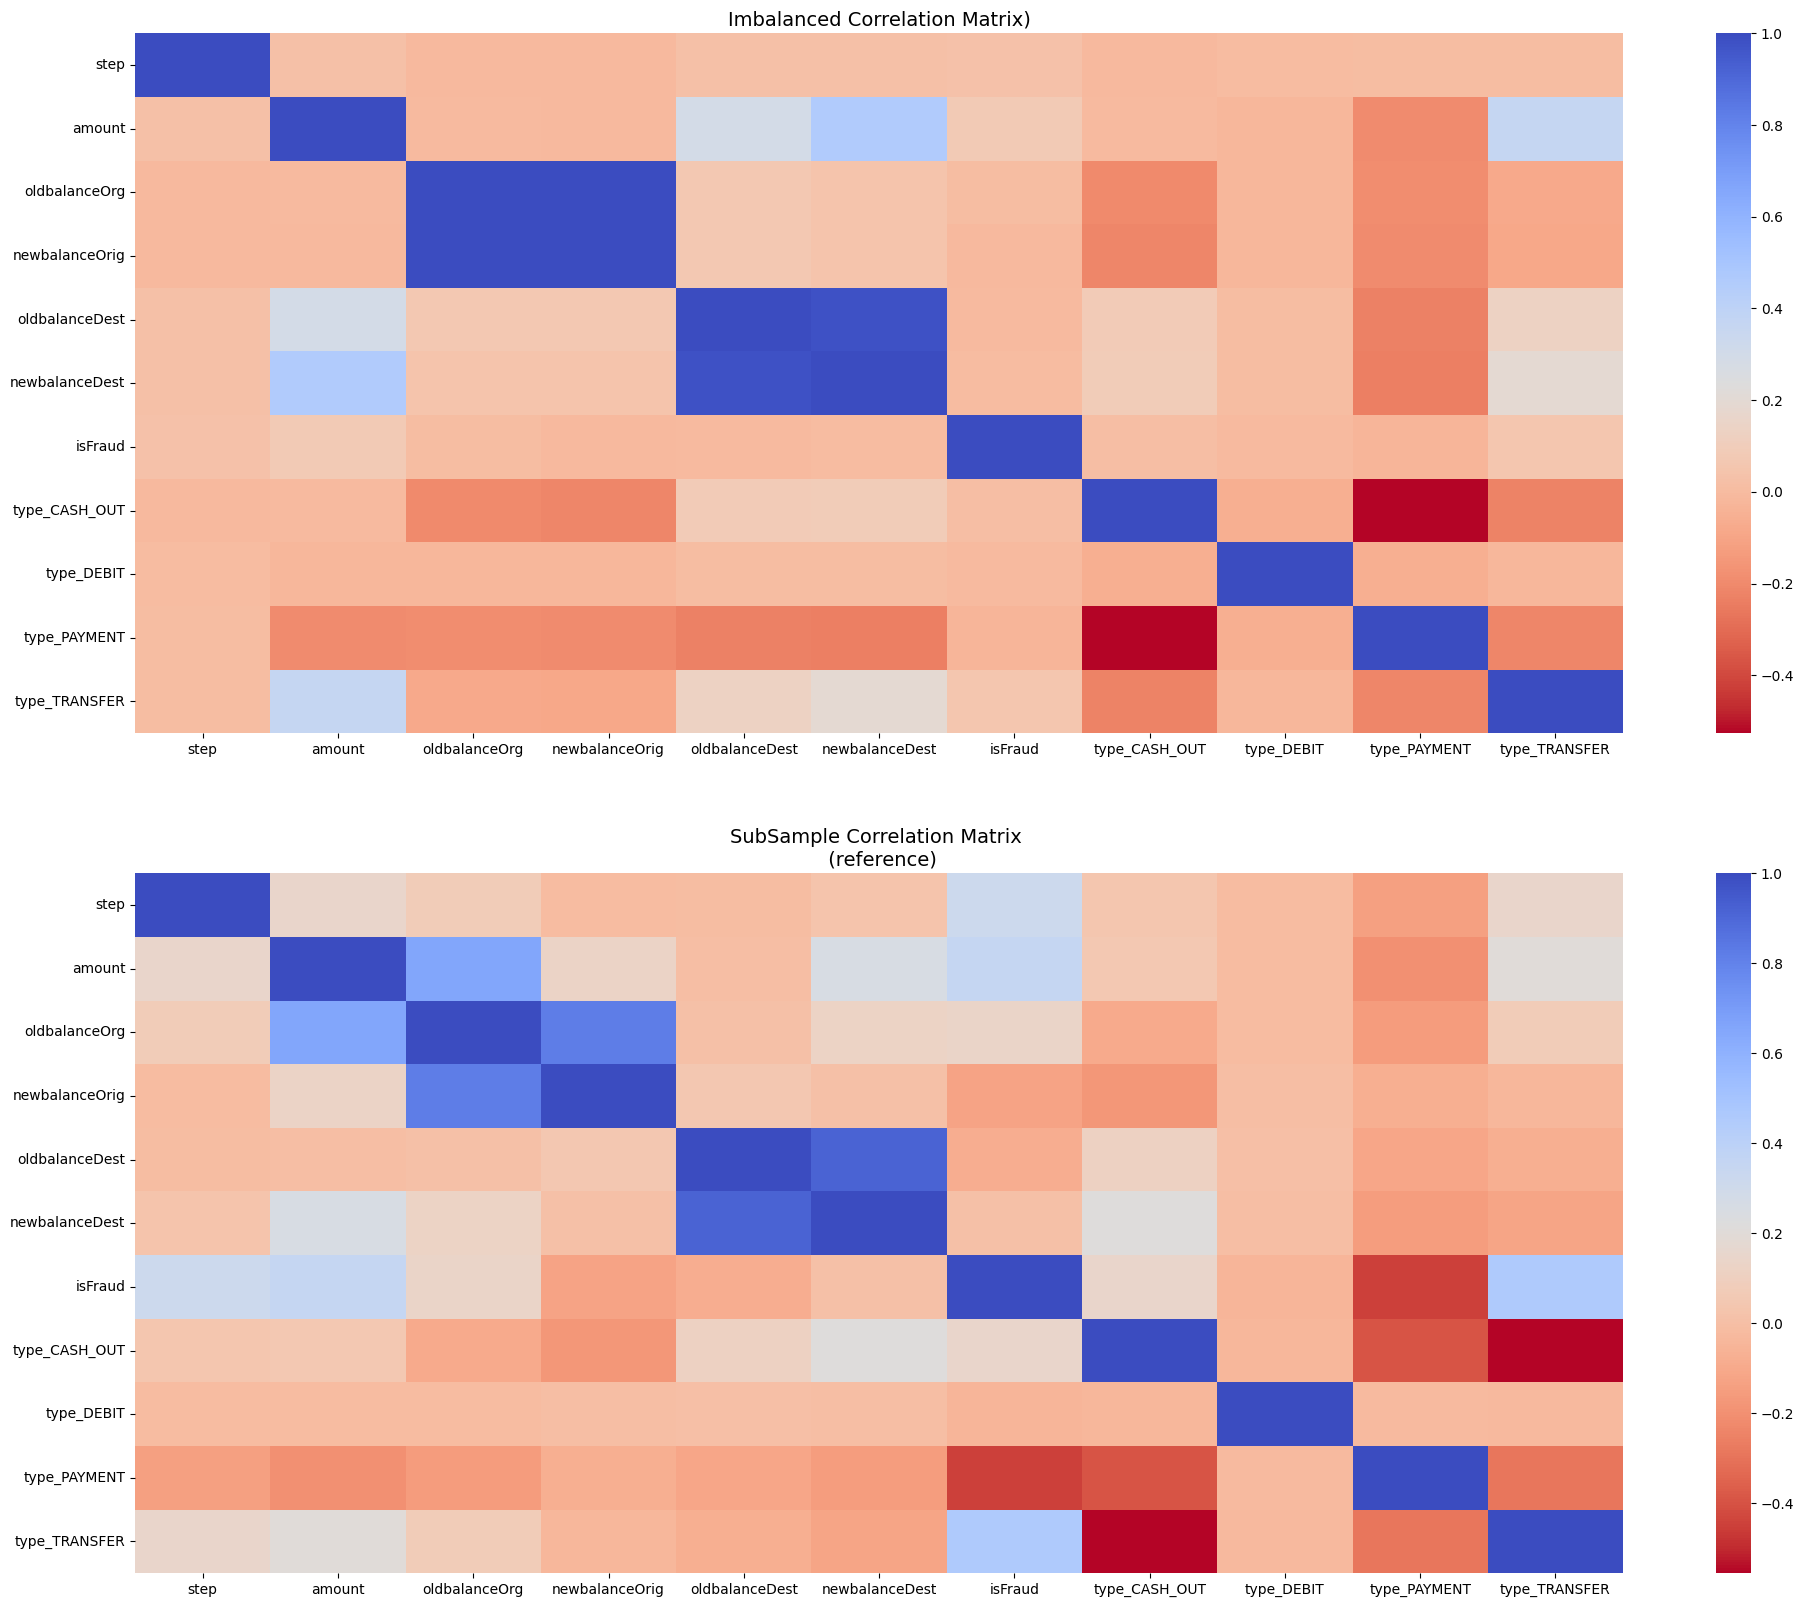

In [52]:
#use the subsample in correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = payment_card.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (reference)', fontsize=14)
plt.show()

In [55]:
m=payment_card.drop('isFraud',axis=1)
n=payment_card['isFraud']

In [56]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model_AS = ExtraTreesRegressor()
model_AS.fit(m,n)
print(model_AS.feature_importances_)

[0.13590785 0.24792432 0.27767436 0.07991206 0.05486463 0.18945994
 0.00949375 0.         0.         0.00476309]


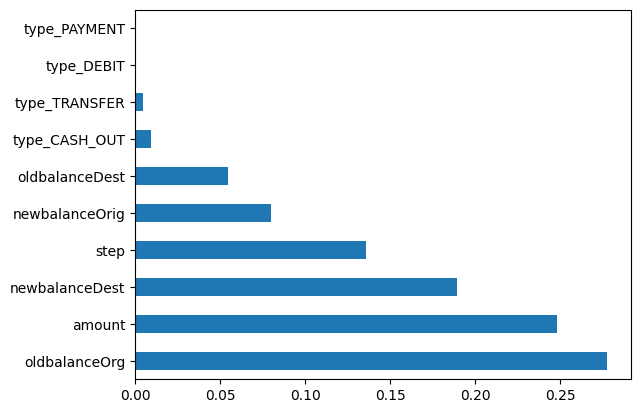

In [57]:
#plot graph of feature importances for better visualization
feat_importances_AS = pd.Series(model_AS.feature_importances_, index=m.columns)
feat_importances_AS.nlargest(10).plot(kind='barh')
plt.show()

In [58]:
# Doing train_test_split
M_train,M_test,n_train,n_test=train_test_split(m,n,train_size=0.7)
# Applying StratifiedKFold
skf_AS=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [59]:
model1_AS=LogisticRegression()
param={'C':10.0 **np.arange(-1,2)}
lrs_AS=RandomizedSearchCV(model1_AS,param,cv=skf_AS,n_jobs=-1,scoring='accuracy')
lrs_AS.fit(M_train,n_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [60]:
best_model_AS = lrs_AS.best_estimator_
coefficients_AS = best_model_AS.coef_
intercept_AS = best_model_AS.intercept_
classes_AS = best_model_AS.classes_

print("Logistic Regression Model Summary After Sampling:")
print("Coefficients:", coefficients_AS)
print("Intercept:", intercept_AS)
print("Classes:", classes_AS)

#Uing the model to predict and evaluate
predictions_AS = best_model_AS.predict(M_test)
accuracy_AS = best_model_AS.score(M_test, n_test)
print("Predictions:", predictions_AS)
print("Accuracy:", accuracy_AS)


Logistic Regression Model Summary After Sampling:
Coefficients: [[ 0.92295416 -3.59512759  3.35079615 -4.97827445  5.11795405 -6.27610071
  11.38219616 -1.4545464  -2.80619923 12.9826072 ]]
Intercept: [-18.78091175]
Classes: [0 1]
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9992586911261923


In [61]:
n_pred=lrs_AS.predict(M_test)
print(confusion_matrix(n_test,n_pred))
print(accuracy_score(n_test,n_pred))
print(classification_report(n_test,n_pred))

[[1906162     111]
 [   1304    1209]]
0.9992586911261923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906273
           1       0.92      0.48      0.63      2513

    accuracy                           1.00   1908786
   macro avg       0.96      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786

